<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_10/conspect_les2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Підготовка даних
---

In [12]:
!pwd

/home/sergio/Desktop/DataScienceHW/example_kaggle/les_10


In [10]:
import pathlib

current_dir = pathlib.Path.cwd()  # Get the current working directory
zip_path = current_dir / "dogs-vs-cats/train.zip"
extract_to = current_dir / "train"

# Unzipping the file
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to: {extract_to}")


Files extracted to: /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/train


In [11]:

!python prepare_dataset.py ./train/train ./dataset


Start creation of dataset directories...
Done
Copying...
Copying cat.0.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.1.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.2.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.3.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.4.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.5.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.6.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.7.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.8.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle/les_10/dataset/train/cats
Copying cat.9.jpg to /home/sergio/Desktop/DataScienceHW/example_kaggle

In [ ]:
!ls -l 

---
# Конструювання мережі
---

In [3]:
import keras
print(keras.__version__)


3.9.1


In [4]:
from keras import layers
from keras import models


model = models.Sequential([
    layers.Conv2D(
        32, (3, 3), activation="relu",
        input_shape=(150, 150, 3)
    ),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),

    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"]
)


/home/sergio/Desktop/DataScienceHW/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-02 15:49:30.313793: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

---
# Попередня обробка даних
---

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = './dataset/train'
validation_dir = './dataset/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/30


/home/sergio/Desktop/DataScienceHW/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 139ms/step - accuracy: 0.5012 - loss: 0.7088 - val_accuracy: 0.5070 - val_loss: 0.6875
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 135ms/step - accuracy: 0.5513 - loss: 0.6913 - val_accuracy: 0.5470 - val_loss: 0.6938
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.6060 - loss: 0.6642 - val_accuracy: 0.6670 - val_loss: 0.6263
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.7043 - loss: 0.5820 - val_accuracy: 0.6860 - val_loss: 0.5896
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.7081 - loss: 0.5893 - val_accuracy: 0.6960 - val_loss: 0.5752
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - accuracy: 0.7586 - loss: 0.5023 - val_accuracy: 0.6760 - val_loss: 0.6113
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - accuracy: 0.7864 - loss: 0.4457 - val_accuracy: 0.6760 - val_loss: 0.9057
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 134ms/step - accuracy: 0.7964 - loss: 0.4145 - val

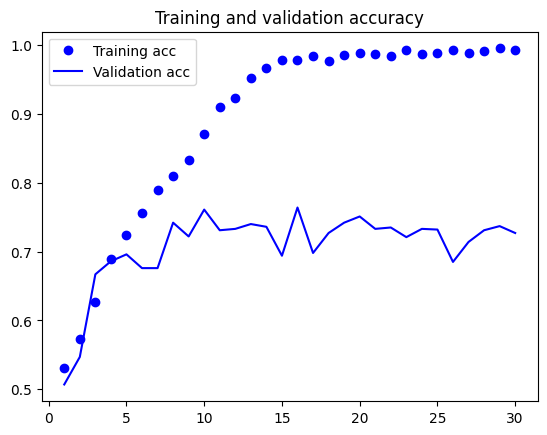

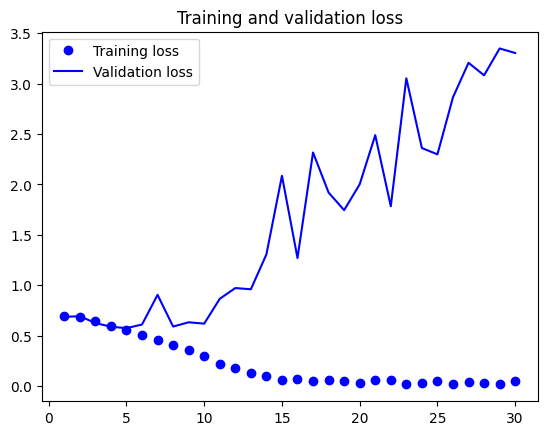

In [15]:
import matplotlib.pyplot as plt


acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")

plt.legend()
plt.show()


---
# Розширення даних
---

In [21]:
!pip install keras-preprocessing
!pip install more-itertools

In [18]:
from keras_preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)


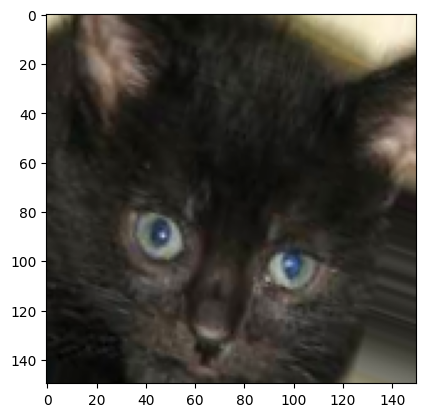

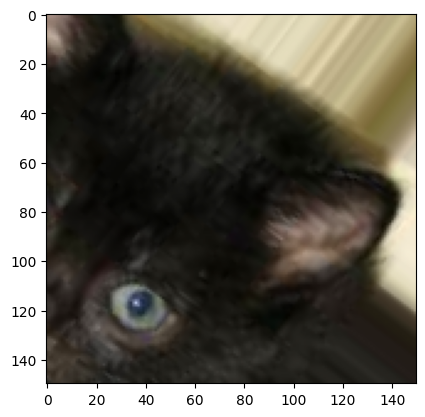

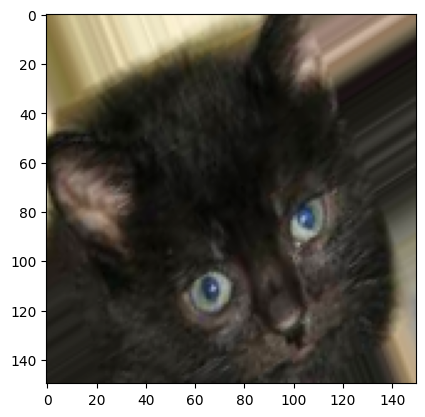

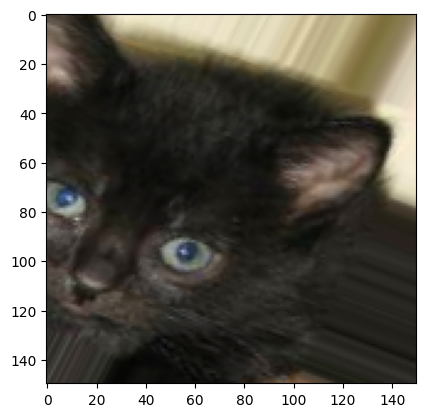

In [24]:
import os

import matplotlib.pyplot as plt

from more_itertools import take
from keras.preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_cats_dir = "dataset/train/cats"

fnames = [
    os.path.join(train_cats_dir, fname)
    for fname in os.listdir(train_cats_dir)
]

img_path = fnames[92]
img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

for batch in take(4, datagen.flow(x, batch_size=1)):
    plt.figure()
    imgplot = plt.imshow(image.array_to_img(batch[0]))

plt.show()


---
Продовжуючи боротьбу з перенавчанням, додамо до моделі шар Dropout
---

In [26]:
from keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["acc"]
)


/home/sergio/Desktop/DataScienceHW/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/home/sergio/Desktop/DataScienceHW/venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - acc: 0.8352 - loss: 0.3958 - val_acc: 0.8260 - val_loss: 0.3913
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - acc: 0.8191 - loss: 0.4082 - val_acc: 0.8140 - val_loss: 0.4206
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - acc: 0.8167 - loss: 0.3836 - val_acc: 0.8000 - val_loss: 0.5019
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - acc: 0.8316 - loss: 0.3770 - val_acc: 0.8240 - val_loss: 0.4149
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - acc: 0.8334 - loss: 0.3830 - val_acc: 0.8340 - val_loss: 0.3832
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - acc: 0.8282 - loss: 0.3891 - val_acc: 0.8200 - val_loss: 0.4468
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - acc: 0.8325 - loss: 0.3822 - val_acc: 0.8290 - val_loss: 0.4055
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - acc: 0.8581 - loss: 0.3557 - val_acc: 0.8510 - val_loss: 0.4283
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━

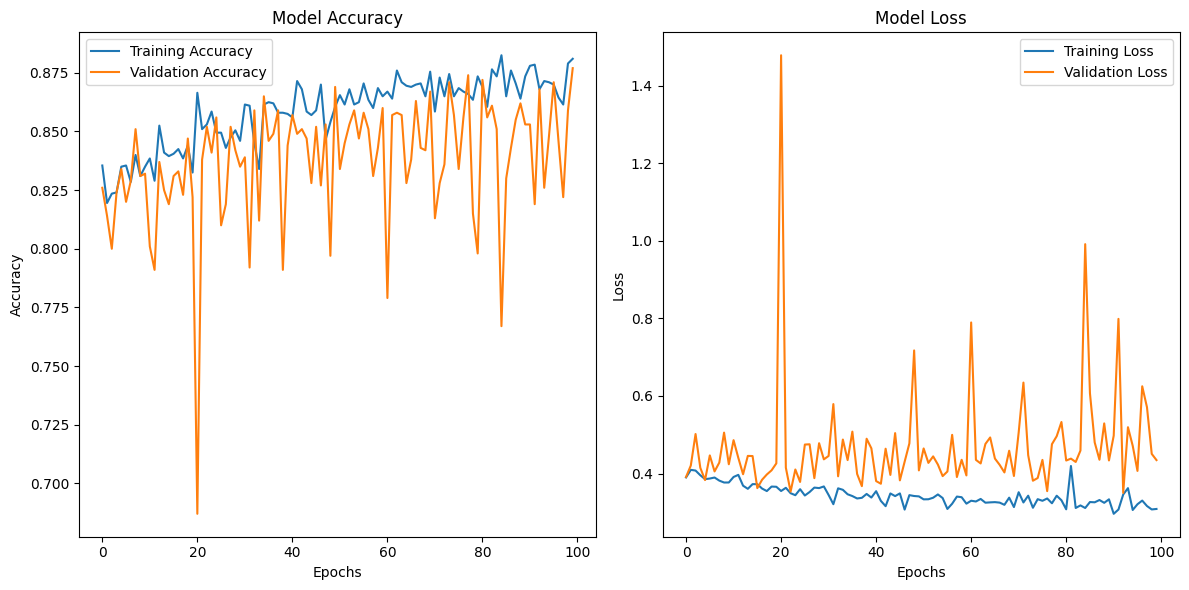

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

---
# Залишкові нейронні мережі
---

Під час навчання глибоких нейронних мереж у нас можуть виникати ряд проблем. Основною є те, що чим глибше ми "спускаємось" по мережі, тим більше у нас втрачається загальна інформація про картинку, а ми заглиблюємось в деталі, ну і звичайно ми страждаємо на проблему затухання градієнтів. І щоб вирішити ці проблеми, і всерівно побудувати глибоку нейромережу вигадали залишкові нейронні мережі.



ResNet (Residual Neural Network) є одним з найвпливовіших архітектур згорткових нейронних мереж, яка змінила підхід до навчання глибоких моделей. Одна з ключових інновацій, що впроваджена в ResNet, це використання skip connection (з'єднання з пропуском) або також відомих як "residual connection" (зворотне з'єднання).



Skip connection дозволяє нейронним мережам більш ефективно навчатися глибоким представленням шляхом "пропуску" певних шарів. Замість безпосереднього передачі виходу одного шару в наступний шар, використовується з'єднання, яке "перескакує" через один або декілька шарів. Це досягається додаванням вхідного сигналу до виходу одного або кількох шарів.



Ця концепція заснована на припущенні, що додаванням skip connection до глибоких моделей дозволяє нейронній мережі "вчитися" різниці між вхідним та вихідним сигналом, а не намагатися безпосередньо моделювати функцію відображення. Це допомагає уникнути проблеми зі зникненням градієнту та дозволяє побудувати набагато глибші моделі, які можуть досягати кращої точності.

![RNN](./RNN.png)


![RNN][def]

[def]: ./cheat+sheet.png